In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Generate same synthetic data point or reproduciblity of results
np.random.seed(1)

In [3]:
#genrate synthetic X
x = 2 * np.random.rand(100,1)

In [4]:
x

array([[8.34044009e-01],
       [1.44064899e+00],
       [2.28749635e-04],
       [6.04665145e-01],
       [2.93511782e-01],
       [1.84677190e-01],
       [3.72520423e-01],
       [6.91121454e-01],
       [7.93534948e-01],
       [1.07763347e+00],
       [8.38389029e-01],
       [1.37043900e+00],
       [4.08904499e-01],
       [1.75623487e+00],
       [5.47751864e-02],
       [1.34093502e+00],
       [8.34609605e-01],
       [1.11737966e+00],
       [2.80773877e-01],
       [3.96202978e-01],
       [1.60148914e+00],
       [1.93652315e+00],
       [6.26848356e-01],
       [1.38464523e+00],
       [1.75277830e+00],
       [1.78921333e+00],
       [1.70088423e-01],
       [7.81095665e-02],
       [3.39660839e-01],
       [1.75628501e+00],
       [1.96693668e-01],
       [8.42215250e-01],
       [1.91577906e+00],
       [1.06633057e+00],
       [1.38375423e+00],
       [6.31031262e-01],
       [1.37300186e+00],
       [1.66925134e+00],
       [3.65765547e-02],
       [1.50028863e+00],


In [10]:
#generate random synthetic y using x
y = 4 + 3 * x + 1.5 * x ** 2 + np.random.randn(100,1)

In [11]:
y

array([[ 7.58924514],
       [11.20883697],
       [ 5.33214344],
       [ 6.07511748],
       [ 5.68982893],
       [ 4.28538847],
       [ 4.05315971],
       [ 7.10338538],
       [ 7.82833623],
       [10.26806712],
       [ 7.45906431],
       [10.31110952],
       [ 6.04027893],
       [14.1359831 ],
       [ 4.44949112],
       [10.64685245],
       [ 8.70902717],
       [ 9.59443763],
       [ 6.8652313 ],
       [ 6.53513083],
       [13.31066839],
       [13.80731399],
       [ 7.07227264],
       [11.45008152],
       [14.67763426],
       [15.21400857],
       [ 4.15278218],
       [ 5.06748597],
       [ 4.62973131],
       [15.85053863],
       [ 3.31616193],
       [ 5.82994698],
       [13.60193003],
       [ 8.01402745],
       [ 9.90431093],
       [ 8.44647337],
       [10.62020721],
       [11.84467832],
       [ 5.22611941],
       [11.29064091],
       [14.56339068],
       [12.72334393],
       [ 6.77791913],
       [12.03849044],
       [ 6.09082969],
       [ 8

In [13]:
#train-test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 1)
(20, 1)
(80, 1)
(20, 1)


In [14]:
#perform polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly_reg.fit_transform(x_train)
x_test_poly = poly_reg.transform(x_test)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
model = LinearRegression()

In [21]:
model

LinearRegression()

In [22]:
model.fit(x_train_poly, y_train)

LinearRegression()

In [23]:
model.coef_

array([[3.83876197, 1.04220287]])

array([[3.83876197, 1.04220287]])

In [24]:
model.intercept_

array([3.96261533])

array([3.96261533])

In [25]:
#Make prediction on train data itself for the evaluation metriccs

In [26]:
y_poly_pred = model.predict(x_train_poly)

In [27]:
y_poly_pred

array([[ 3.9634935 ],
       [12.878949  ],
       [ 9.73904317],
       [11.30405496],
       [ 5.64714593],
       [ 6.7999998 ],
       [ 7.79051789],
       [ 4.26881795],
       [14.37992383],
       [ 4.10441832],
       [ 9.02088575],
       [10.28852643],
       [ 8.74404902],
       [ 6.01660693],
       [10.89112495],
       [15.63107671],
       [ 6.51725603],
       [11.37633447],
       [11.27609434],
       [11.27010324],
       [ 8.0132807 ],
       [ 6.29532002],
       [ 7.13677666],
       [10.98413769],
       [ 7.14876035],
       [12.04017498],
       [ 8.23762808],
       [15.01064985],
       [ 4.6456953 ],
       [ 3.98468668],
       [12.61933682],
       [ 4.38417849],
       [13.89300282],
       [ 5.1791221 ],
       [ 9.93477179],
       [ 5.03139669],
       [15.30485459],
       [15.25101253],
       [ 6.66483104],
       [ 7.67507324],
       [ 4.75799666],
       [10.89579022],
       [14.30081821],
       [ 6.44360295],
       [ 6.57623517],
       [10

In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
mean_squared_error(y_train, y_poly_pred)

0.885976724233835

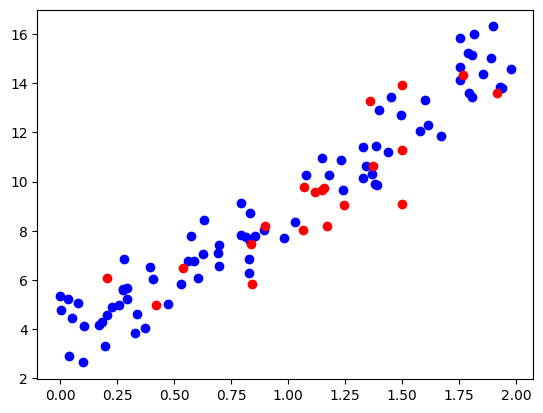

In [32]:
plt.scatter(x_train, y_train, label = 'Trained Data', color = 'blue')


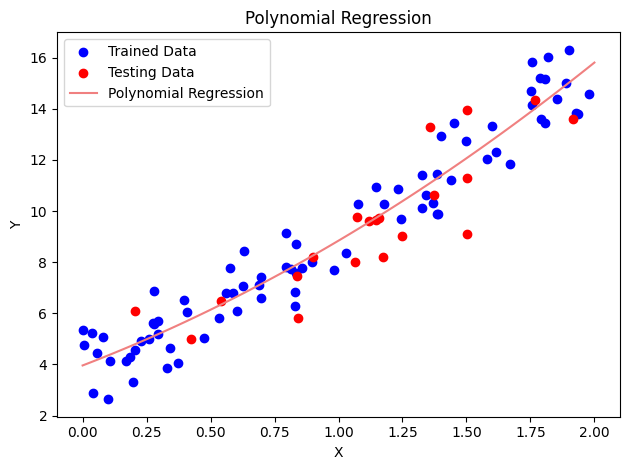

In [45]:
x_range = np.linspace(0,2,100).reshape(-1,1)
plt.scatter(x_train, y_train, label = 'Trained Data', color = 'blue')
plt.scatter(x_test, y_test, label = 'Testing Data', color = 'red')
x_range_poly = poly_reg.transform(x_range)
x_range_poly = poly_reg.transform(x_range)
y_range_pred = model.predict(x_range_poly)
plt.plot(x_range, model.predict(x_range_poly), label = 'Polynomial Regression', color = 'lightcoral')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression')
plt.legend()
plt.tight_layout()
plt.show()